In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import matplotlib as mpl
import seaborn as sns
import matplotlib.pylab as plt
import tqdm

from matplotlib import rc, font_manager
font_path = '/Library/Fonts/NanumGothicBold.ttf'
fontprop = font_manager.FontProperties(fname=font_path, size=14)

In [3]:
loans_income = pd.read_csv('./data/loans_income.csv', squeeze=True)

In [4]:
loans_income.head()

0     67000
1     52000
2    100000
3     78762
4     37041
Name: x, dtype: int64

In [6]:
# 분포 볼 때 사용할 함수
def plot_dist(x, bins, hist = True, kde = None, label = None, color=None, line_median = None, line_mean = None, x_format = False, y_format = False):
  data = np.asarray(x)
  sns.set(rc = {"figure.figsize": (20, 10)})
  ax = sns.distplot(data, bins = int(round((abs(data.max()) - abs(data.min())) * bins,1)), hist = hist, kde = kde, label = label, color=color)
  
  if line_median is None and line_mean is None:
    pass
  elif line_median is not None and line_mean is None:
    plt.axvline(round(np.median(data), 2), 1, 0, color = 'red', ls = '--', alpha = 0.5)
    plt.text(x = np.median(data), y = line_median, s = "Median:" + str(round(np.median(data), 3)), bbox = dict(facecolor = 'red', alpha = 0.3), fontsize = 14)
  elif line_median is None and line_mean is not None:
    plt.axvline(round(np.mean(data), 2), 1, 0, color = 'blue', ls = '--', alpha = 0.5)
    plt.text(x = np.mean(data), y = line_mean, s = "Mean:" + str(round(np.mean(data), 3)), bbox = dict(facecolor = 'blue', alpha = 0.3), fontsize = 14)
  else:
    plt.axvline(round(np.median(data), 2), 1, 0, color = 'red', ls = '--', alpha = 0.5)
    plt.axvline(round(np.mean(data), 2), 1, 0, color = 'blue', ls = '--', alpha = 0.5)
    plt.text(x = np.median(data), y = line_median, s = "Median:" + str(round(np.median(data), 3)), bbox = dict(facecolor = 'red', alpha = 0.3), fontsize = 14)
    plt.text(x = np.mean(data), y = line_mean, s = "Mean:" + str(round(np.mean(data), 3)), bbox = dict(facecolor = 'blue', alpha = 0.3), fontsize = 14)
  if y_format is True:
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
  if x_format is True:
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    
def plot_title(title, xlabel, ylabel, fontproperties = None, fontsize = None):
  plt.title(label = title, fontproperties = fontproperties, fontsize = fontsize)
  plt.xlabel(xlabel = xlabel, fontproperties = fontproperties, fontsize = fontsize)
  plt.ylabel(ylabel = ylabel, fontproperties = fontproperties, fontsize = fontsize)

---
- 빅데이터 시대가 되면서 샘플링이 필요없을 것이라고 오해하는 경향이 늘어나고 있다.
- 하지만 데이터의 질과 정합성이 보장되지 않은 채 크기만 늘어나는 경우가 많다.
- 따라서 오히려 데이터의 **편향을 최소화** 하기 위한 방법으로 표본추출의 필요성이 더 커지고 있다.
---

# 랜덤표본추출과 표본편향

- **표본**은 더 큰 데이터(**모집단**) 집합으로부터 얻은 데이터의 부분집합이다.
- 통계학에서의 모집단은 생물학에서처럼 전체 크기가 유한한 모집단으로 정의될 때도 있지만 이론적인 가상의 집합을 의미하기도 한다.

---
- random sampling(랜덤표본추출): 무작위로 표본을 추출하는 것
- stratified sampling(층화표본추출): 모집단을 층으로 나눈 뒤 각 층에서 무작위로 표본을 추출하는 것
- simple random sample(단순랜덤표본): 모집단 층화 없이 랜덤표본추출로 얻은 표본
- sample bias(표본편향): 모집단을 잘못 대표하는 표본

## 편향(bias)
- 편향의 사전적 의미는 '힌쪽으로 치우짐'이다.
- 통계젹 편향(偏向)은 측정 과정이나 표본추출 과정에서 발생하는 계통적인(systematic) 오차를 의미한다.
- 즉, 편향된 표본이 있을 경우 **모집단을 제대로 대표하지 못하게 됨**을 의미한다.
- 랜덤표본추출로 인한 오류와 편향에 따른 오류는 신중하게 구분해서 봐야 한다.

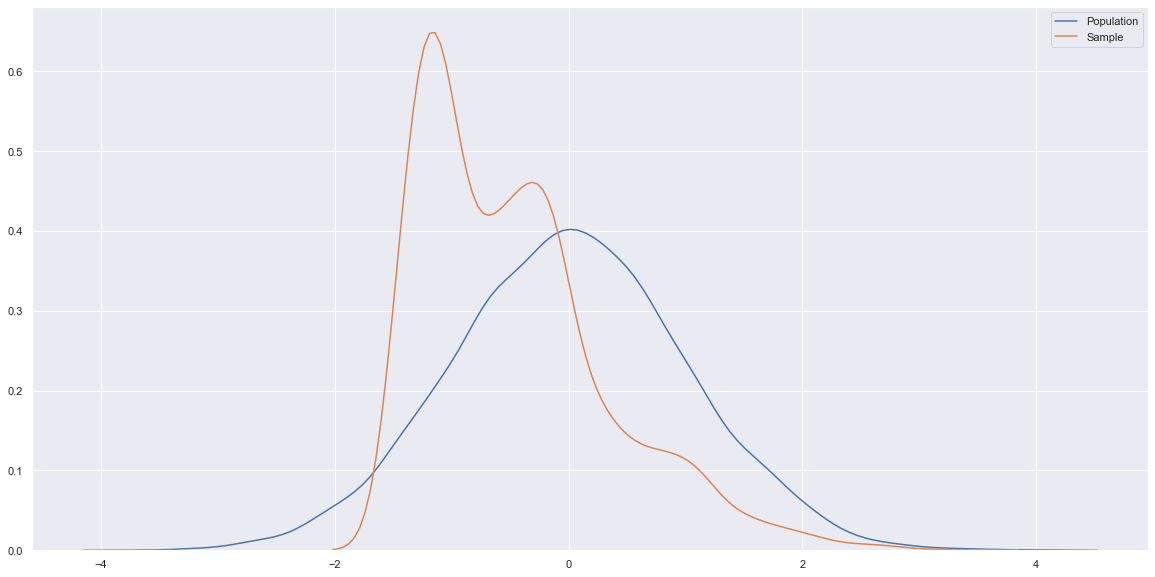

In [6]:
import random
np.random.seed(seed=1)

population = np.random.normal(loc=0, scale=1, size=10000)
sns.set(rc = {"figure.figsize": (20, 10)})
sns.distplot(population, bins=100, hist=False, kde=True, label='Population')

idx1 = len(population[(population>-1.5) & (population<-1)])
idx1 = random.sample(range(idx1), int(idx1*0.9))
sample1 = population[(population>-1.5) & (population<-1)][idx1]

idx2 = len(population[(population>-1) & (population<0)])
idx2 = random.sample(range(idx2), int(idx2*0.3))
sample2 = population[(population>-1) & (population<-0)][idx2]

idx3 = len(population[population>0])
idx3 = random.sample(range(idx3), int(idx3*0.1))
sample3 = population[population>0][idx3]

random_idx = random.sample(range(len(population)), 3000)
sample_from_population = np.concatenate((sample1, sample2, sample3))
sns.distplot(sample_from_population, hist=False, kde=True, bins=100, label='Sample')

plt.legend();

## 랜덤 선택(random sampling)
- 편향에 의한 오차를 방지하기 위해 **랜덤표본추출**을 시행한다.
- 이때 모집단 내 세그먼트가 존재하면서 세그먼트 별로 size가 다를 때는 **층화추출표본**을 시행해야 한다.

## 크기와 품질: 크기는 언제 중요해질까?
- 빅데이터 시대라고 해도 의이로 데이터 수가 적을수록 유리한 경우가 있다.
- 랜덤표본추출에 시간을 들일수록 편향이 줄 뿐만 아니라 데이터 탐색 및 품질에 더 집중할 수 있다.
- 예를 들어 몇 천만 데이터 중에서 결측치를 Imputation 하는 것은 꽤나 어려울 수 있지만, 수천 개의 샘플이서는 더 쉬울 수 있다.

# 선택 편향
- 어떤 가설을 세우고 이에 대한 검증을 제대로 수행한다면 그 결과를 강하게 확신할 수 있다. 하지만 이런 경우는 그리 많지 않다.
- 보통은 갖고 있는 데이터를 먼저 확인한 후 그 안에서 패턴을 찾고자 한다. 하지만 이 패턴이 우연히 발견된 패턴인지 아닌지는 알 수가 없다.
- 다시 말해 데이터를 너무 지엽적으로 쪼개다 보면 결국 편향된 결과를 불러일으키게 된다는 것이다. 이것을 주의해야 한다.

# 통계학에서의 표본분포
- 표본분포
- 중심극한정리
- 표준오차

## 중심극한정리
- 무수히 많은 표본 평균으로 모평균을 추정한다.

In [115]:
from google.cloud import bigquery
client = bigquery.Client()

QUERY = client.query("""
    SELECT order_id
          ,order_amt
      FROM `rgpkorea-datawarehouse.dhk_mart.fact_order_20200607` AS ord
     WHERE ord.order_detail_type = 'touch'
       AND ord.order_result_code = 'success'
       AND ord.test_order_yn = FALSE
       AND ord.district_id <> 5981
  """)
df = QUERY.result().to_dataframe()

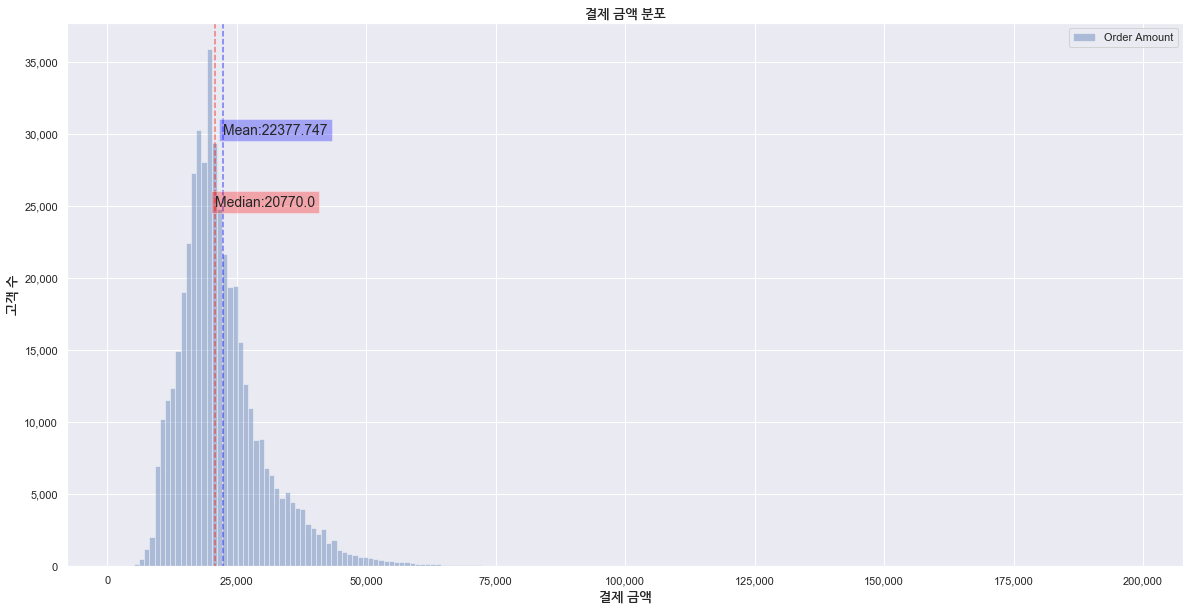

In [17]:
plot_dist(df.order_amt, bins=0.001, label='Order Amount', line_median=25000, line_mean=30000, x_format=True, y_format=True)
plot_title(title='결제 금액 분포', xlabel='결제 금액', ylabel='고객 수', fontproperties=fontprop, fontsize=13)
plt.legend();

모집단의 10.0% 표본평균 분포의 평균값: 22375.931 *표준편차: 41.527
모집단의 20.0% 표본평균 분포의 평균값: 22377.004 *표준편차: 35.68
모집단의 30.0% 표본평균 분포의 평균값: 22377.361 *표준편차: 32.067
모집단의 40.0% 표본평균 분포의 평균값: 22377.651 *표준편차: 29.61
모집단의 50.0% 표본평균 분포의 평균값: 22377.809 *표준편차: 27.776


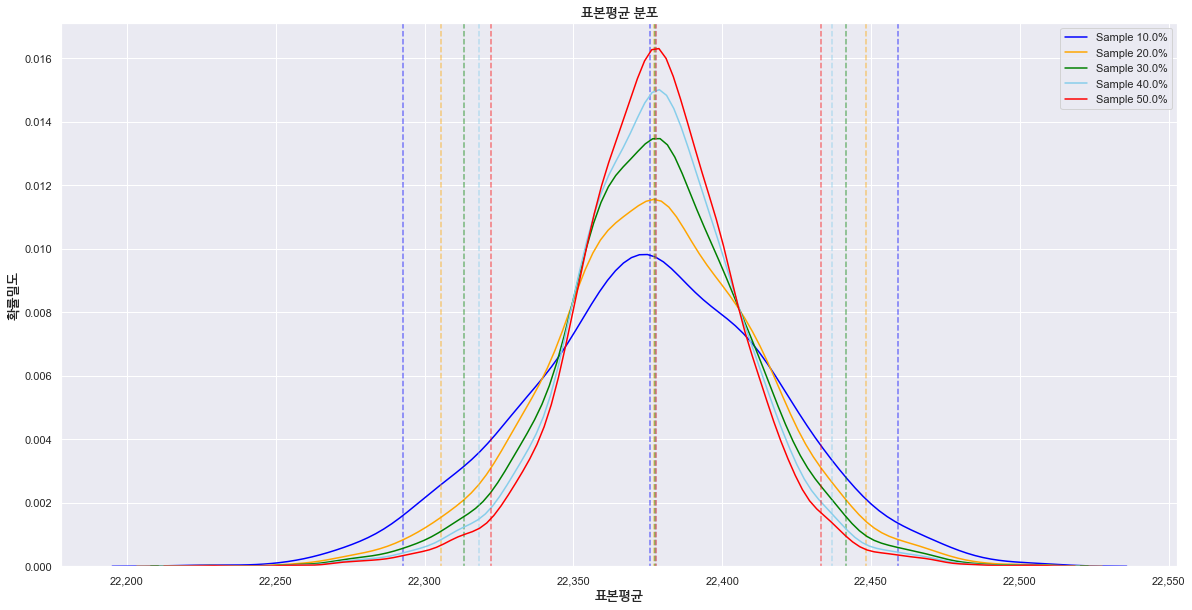

In [15]:
#chosen_idx = np.random.choice(1000, replace=False, size=50)
sample_mean = []
for frac, color in zip((0.1, 0.2, 0.3, 0.4, 0.5), ('blue', 'orange', 'green', 'skyblue', 'red')):
  for _ in range(1000):
    x = df.sample(frac=frac, replace=True).order_amt.mean()
    sample_mean.append(round(x))
  print("모집단의 {}% 표본평균 분포의 평균값: {} *표준편차: {}".format(str(frac*100), round(np.mean(sample_mean), 3), round(np.std(sample_mean), 3)))
  plot_dist(sample_mean, bins=1, hist=False, kde=True, color=color, label='Sample {}%'.format(str(frac*100)), x_format=True)
  plt.axvline(np.mean(sample_mean), 1, 0, ls = '--', color=color, alpha=0.5)
  plt.axvline(np.mean(sample_mean)-(np.std(sample_mean)*2), 1, 0, ls = '--', color=color, alpha = 0.5)
  plt.axvline(np.mean(sample_mean)+(np.std(sample_mean)*2), 1, 0, ls = '--', color=color, alpha = 0.5)
plot_title(title='표본평균 분포', xlabel='표본평균', ylabel='확률밀도', fontproperties=fontprop, fontsize=13)
plt.legend();

## 표준오차(standard error)
- 표본 크기가 커질수록 표준오차는 줄어든다.
- 현대 통계에서 부트스트랩으로 표준 오차를 추정한다.

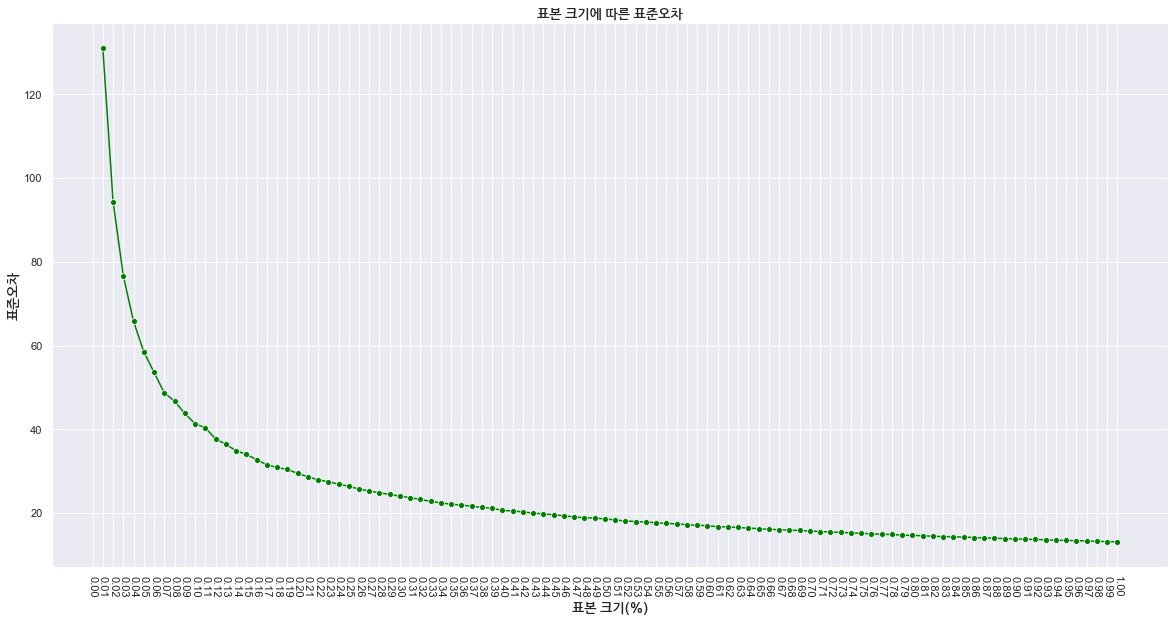

In [135]:
se = []
frac = []
for i in np.linspace(0, 1, 101)[1:]:
  n = df.shape[0]
  size = df.shape[0]*i
  chosen_idx = np.random.choice(n, replace=False, size=int(n*i))
  x = np.std(df.iloc[chosen_idx].order_amt) / np.sqrt(n*i)
  se.append(x)
  frac.append(i)
  
df_se = pd.DataFrame({"frac":frac, "se":se})

sns.lineplot(data = df_se, x = "frac", y = "se", marker = "o", color = "green")
plot_title(title = "표본 크기에 따른 표준오차", xlabel = "표본 크기(%)", ylabel = "표준오차", fontproperties = fontprop, fontsize = 13)
plt.xticks(rotation = -90)
plt.xticks(np.linspace(start = 0, stop = 1, num = 101));

# 부트스트랩(bootstrap)
- 갖고 있는 표본으로 복원추출을 통해 통계량과 모델을 계산하는 방법이다. 해당 표본이 반드시 정규분포를 따를 필요는 없다.
- 결국 중심극한정리의 원리를 이용한 복원추출 기반의 샘플링에 해당한다. 이것으로 모평균 구간을 추정한다.
- 특히 분류 및 회귀 트리를 사용할 때, 여러 부트스트랩 샘플을 가지고 트리를 여러 개 만든 다음 각 트리에서 나온 예측값을 평균 내는 것이 일반적으로 더 효과적이다.
- 이것을 **배깅**이라고 부른다.

In [14]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -63.295500000000175
std. error: 199.89517004860008


모집단의 50% 표본 평균 분포의 평균값: 22377.792 *표준편차: 18.168069132409205


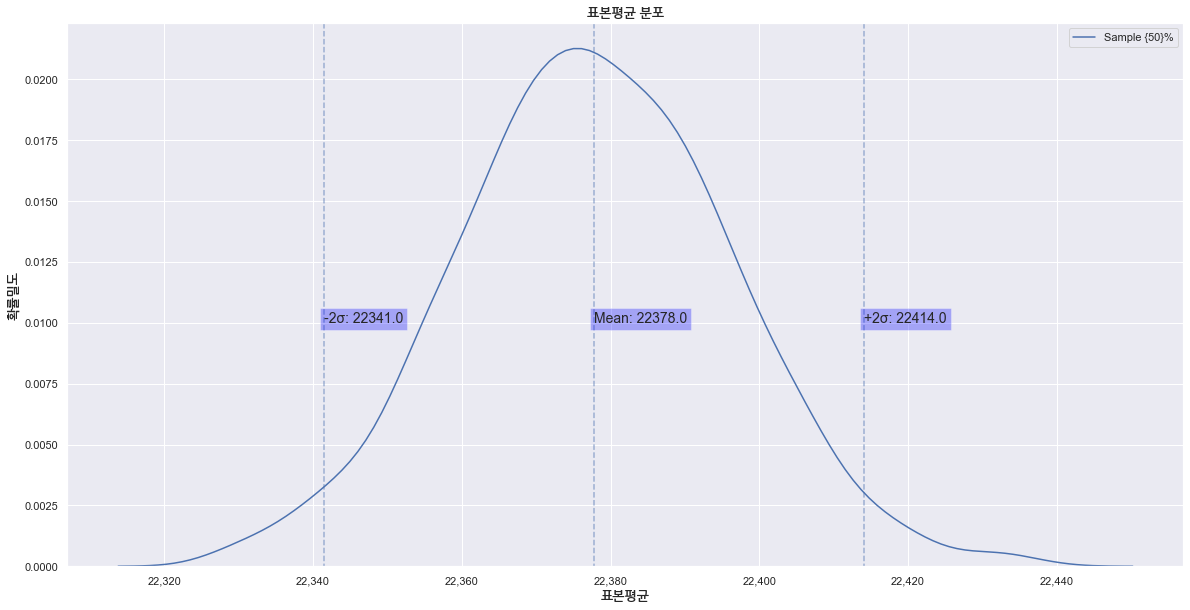

In [18]:
sample_mean = []
for _ in range(1000):
  x = df.sample(frac=0.5, replace=True).order_amt.mean()
  sample_mean.append(round(x))
  
print("모집단의 50% 표본 평균 분포의 평균값: {} *표준편차: {}".format(np.mean(sample_mean), np.std(sample_mean)))
plot_dist(sample_mean, bins=1, hist=False, kde=True, label='Sample {50}%', x_format=True)
plt.axvline(np.mean(sample_mean), 1, 0, ls = '--', alpha=0.5)
plt.axvline(np.mean(sample_mean)-(np.std(sample_mean)*2), 1, 0, ls = '--', alpha = 0.5)
plt.axvline(np.mean(sample_mean)+(np.std(sample_mean)*2), 1, 0, ls = '--', alpha = 0.5)

plt.text(x = np.mean(sample_mean), y = 0.01, s = "Mean: " + str(round(np.mean(sample_mean))), bbox = dict(facecolor = 'blue', alpha = 0.3), fontsize = 14)
plt.text(x = np.mean(sample_mean)-(np.std(sample_mean)*2), y = 0.01, s = "-2σ: " + str(round(np.mean(sample_mean)-(np.std(sample_mean)*2))), bbox = dict(facecolor = 'blue', alpha = 0.3), fontsize = 14)
plt.text(x = np.mean(sample_mean)+(np.std(sample_mean)*2), y = 0.01, s = "+2σ: " + str(round(np.mean(sample_mean)+(np.std(sample_mean)*2))), bbox = dict(facecolor = 'blue', alpha = 0.3), fontsize = 14)

plot_title(title='표본평균 분포', xlabel='표본평균', ylabel='확률밀도', fontproperties=fontprop, fontsize=13)
plt.legend();

# 신뢰구간(interval confidence)
- 불확실성이 있을만한 한 가지 숫자를 뒷받침해줄 수 있는 것이 신뢰구간이다. 즉, 점추정 대신 범위를 활용한 구간으로 신뢰수준을 높일 수 있다.
- 어떠한 분포의 표본으로부터도 부트스트랩을 활용한다면 구간추정이 가능하다.
- 표본 수가 많을 수록, 시행 횟수가 많을 수록 구간의 범위는 좁아진다. 결국 데이터가 많을 수록 상대적으로 확실한 추정이 가능하다.

68760.51844
55734.1


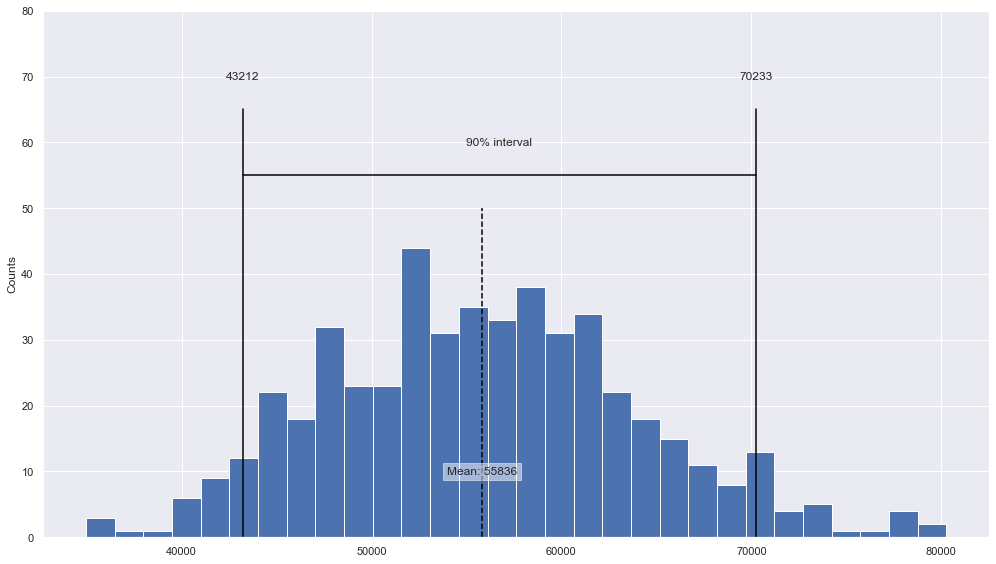

In [45]:
print(loans_income.mean())
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(14, 8))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}',
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Counts')

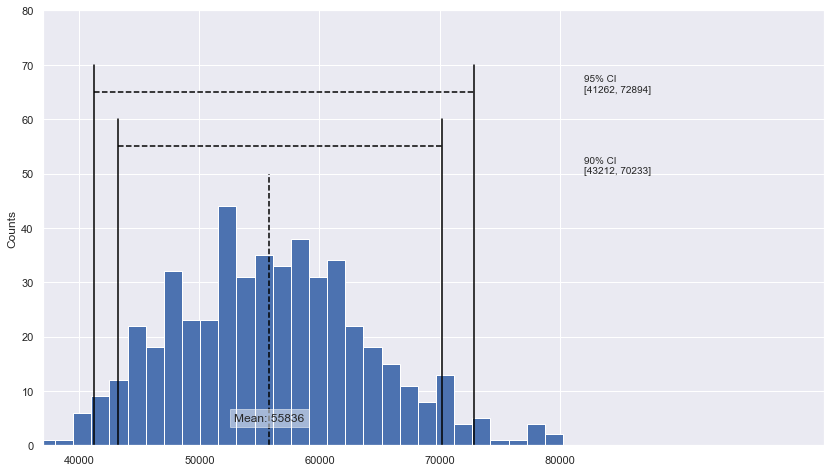

In [47]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(14, 8), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(14, 8))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()

In [48]:
from google.cloud import bigquery
client = bigquery.Client()

QUERY = client.query("""
    SELECT restaurant_id
          ,COUNT(DISTINCT order_id) AS cnt
      FROM `rgpkorea-datawarehouse.dhk_mart.fact_order_20200607` AS ord
     WHERE ord.order_detail_type = 'touch'
       AND ord.order_result_code = 'success'
       AND ord.test_order_yn = FALSE
       AND ord.district_id <> 5981
  GROUP BY 1
  ORDER BY 2 DESC
  """)
df_rest = QUERY.result().to_dataframe()

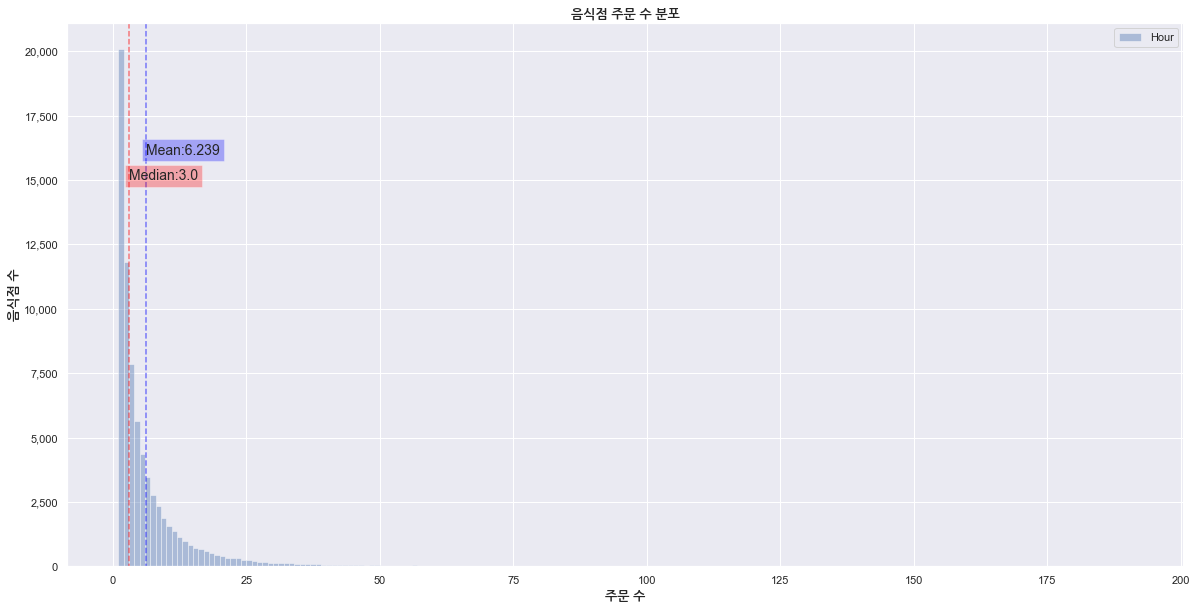

In [49]:
plot_dist(df_rest.cnt, bins=1, label='Hour', line_median=15000, line_mean=16000, x_format=True, y_format=True)
plot_title(title='음식점 주문 수 분포', xlabel='주문 수', ylabel='음식점 수', fontproperties=fontprop, fontsize=13)
plt.legend();

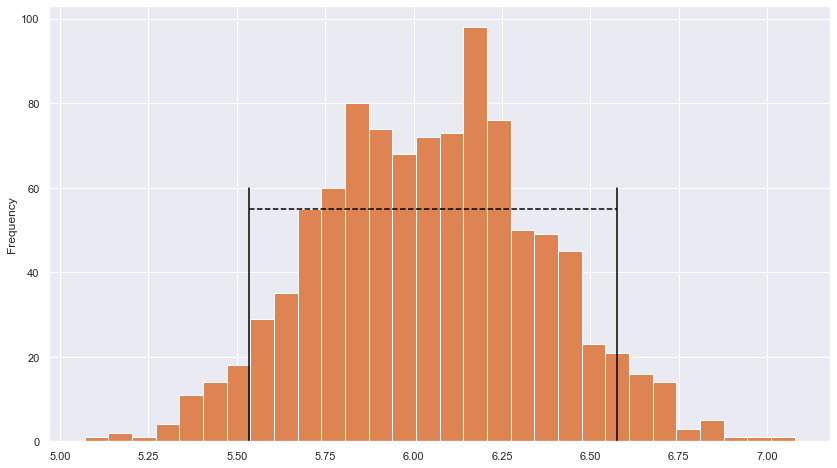

In [68]:
smpl = resample(df_rest.cnt.values, n_samples=int(df_rest.shape[0]*0.01))

results = []
for _ in range(1000):
    sample = resample(smpl)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(14, 8), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
# ax.text(82000, 50, 
#         f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
#        fontsize='small')

# confidence_interval = list(results.quantile([0.025, 0.975]))
# ax = results.plot.hist(bins=30, figsize=(14, 8))
# ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
# for x in confidence_interval:
#     ax.plot([x, x], [0, 70], color='black')
# ax.text(82000, 65, 
#         f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
#        fontsize='small')
# # ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
# #         horizontalalignment='center', verticalalignment='center')

# meanIncome = results.mean()
# ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
# ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
#         bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
#         horizontalalignment='center', verticalalignment='center')
# ax.set_ylim(0, 80)
# ax.set_xlim(37000, 102000)
# ax.set_xticks([40000, 50000, 60000, 70000, 80000])
# ax.set_ylabel('Counts')

# # plt.tight_layout()
# # plt.show()

모집단의 50% 표본 평균 분포의 평균값: 6.23989842605156 *표준편차: 0.048715514580740325


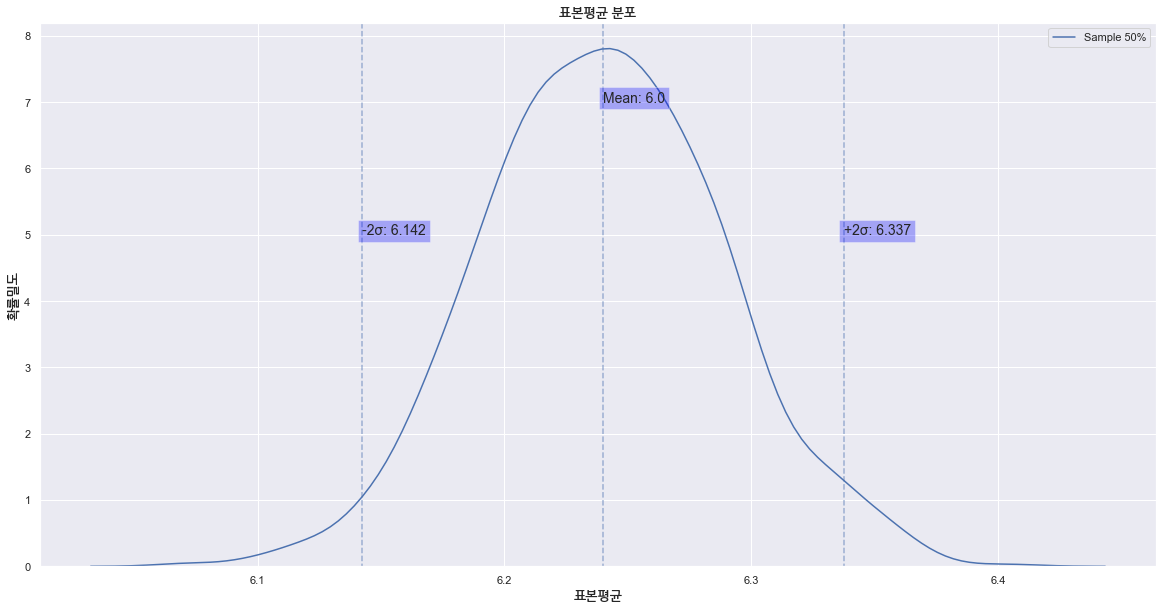

In [32]:

sample_mean = []
for _ in range(2000):
  x = df_rest.sample(frac=0.5, replace=True).cnt.mean()
  sample_mean.append(x)
  
print("모집단의 50% 표본 평균 분포의 평균값: {} *표준편차: {}".format(np.mean(sample_mean), np.std(sample_mean)))
plot_dist(sample_mean, bins=1, hist=False, kde=True, label='Sample 50%')
plt.axvline(np.mean(sample_mean), 1, 0, ls = '--', alpha=0.5)
plt.axvline(np.mean(sample_mean)-(np.std(sample_mean)*2), 1, 0, ls = '--', alpha = 0.5)
plt.axvline(np.mean(sample_mean)+(np.std(sample_mean)*2), 1, 0, ls = '--', alpha = 0.5)
plt.text(x = np.mean(sample_mean), y = 7, s = "Mean: " + str(round(np.mean(sample_mean))), bbox = dict(facecolor = 'blue', alpha = 0.3), fontsize = 14)
plt.text(x = np.mean(sample_mean)-(np.std(sample_mean)*2), y = 5, s = "-2σ: " + str(round(np.mean(sample_mean)-(np.std(sample_mean)*2), 3)), bbox = dict(facecolor = 'blue', alpha = 0.3), fontsize = 14)
plt.text(x = np.mean(sample_mean)+(np.std(sample_mean)*2), y = 5, s = "+2σ: " + str(round(np.mean(sample_mean)+(np.std(sample_mean)*2), 3)), bbox = dict(facecolor = 'blue', alpha = 0.3), fontsize = 14)

plot_title(title='표본평균 분포', xlabel='표본평균', ylabel='확률밀도', fontproperties=fontprop, fontsize=13)
plt.legend();

# 정규분포
- 정규분포는 신뢰구간을 가지는 추정을 사용할 수 있다는 점이 최대 강점이다. 이러한 원리로 비정규분포로부터 부트스트랩을 활용하여 모평균의 구간추정이 가능한 것이다.
- 즉, 불확실성과 변동성을 수학적으로 근사가 하능하도록 만들어진 분포다.
- 하지만 **대부분의 업무를 수행하는 과정에서 정규분포를 만나긴 힘들다. 단지 표본분포의 통계량이 정규분포를 따른다는 점에서 정규분포의 유용함이 드러날 뿐이다.**

## 표준정규분포(z-score)
- 편차를 표준편차로 나누어 각 변수들의 편차의 평균을 0으로 만들어 표준화한다.

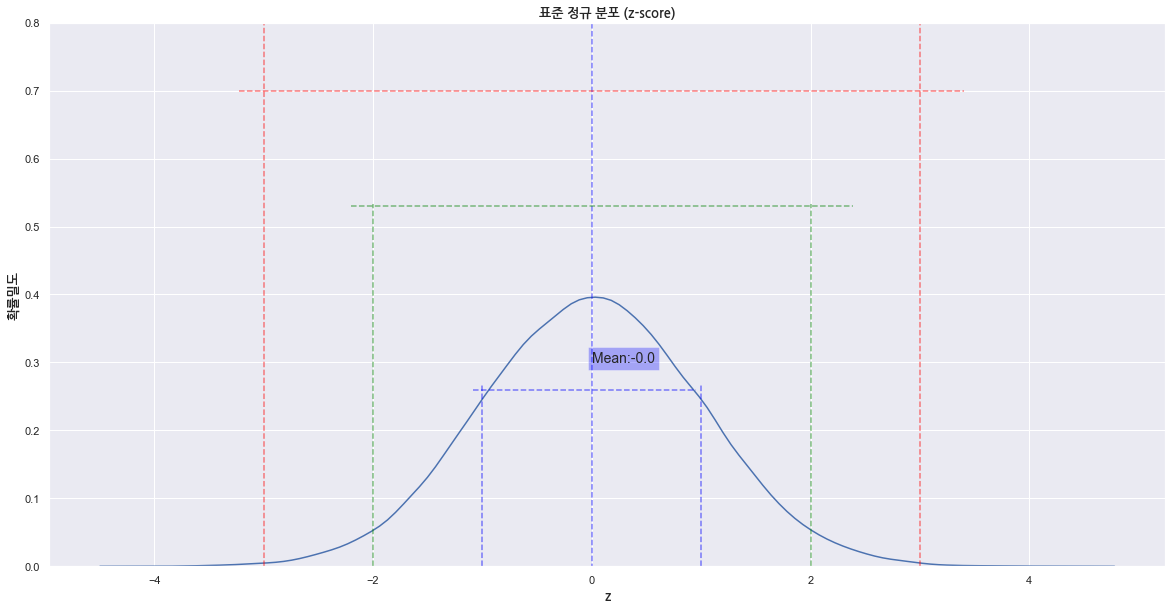

In [67]:
for _ in range(2000):
  x = df_rest.sample(frac=0.5, replace=True).cnt.mean()
  sample_mean.append(x)

x_std = np.std(sample_mean)
x_mean = np.mean(sample_mean)
z = (sample_mean - x_mean) / x_std

plot_dist(z, bins=1000, hist=False, kde=True, line_mean=0.3)
plot_title(title='표준 정규 분포 (z-score)', xlabel='z', ylabel='확률밀도', fontproperties=fontprop, fontsize=13)
plt.ylim(0, 0.8)
for i, c in zip((1, 2, 3), ['blue', 'green', 'red']):
  plt.axvline(np.mean(z)-(np.std(z)*i), 0, i/3, ls = '--', color=c, alpha = 0.5)
  plt.axvline(np.mean(z)+(np.std(z)*i), 0, i/3, ls = '--', color=c, alpha = 0.5)

plt.axhline(0.26, 0.38, 0.58, ls = '--', color='blue', alpha = 0.5)
plt.axhline(0.53, 0.27, 0.72, ls = '--', color='green', alpha = 0.5)
plt.axhline(0.7, 0.17, 0.82, ls = '--', color='red', alpha = 0.5);

## QQ plot(quantile-quantile plot)
- 데이터가 정규성을 보이는지 확인하는 방법 중 하나임.
- 변수를 Quantile 형태로 변환 후, 이것의 Z-score를 구하고 실제 변수의 Z-score를 구하여 얼마나 일치하는지 확인하는 것임.

,order_id,order_amt
448576,448778031,24500.0
159030,448421217,19500.0
108613,448698562,25900.0
365289,448769850,20000.0
115912,448655260,15800.0
...,...,...
391561,448644632,19000.0
99520,448250647,68000.0
1763,448570106,40000.0
312107,448514961,23000.0


In [156]:
df_tmp = df.sample(n=1000, replace=False)
df_tmp = df_tmp.sort_values('order_amt').reset_index(drop=True)
df_tmp['idx'] = df_tmp.index + 1
df_tmp['qtl'] = (df_tmp.idx - .5)/df_tmp.idx.max()
df_tmp['qtl_z'] = df_tmp['qtl'] - df_tmp['qtl'].mean() / np.std(df_tmp['qtl'])
df_tmp['z-score'] = (df_tmp.order_amt - df_tmp.order_amt.mean()) / np.std(df_tmp.order_amt)
df_tmp['line'] = np.linspace(df_tmp['qtl_z'].min(), df_tmp['qtl_z'].max(), 1000)

In [149]:
np.linspace(df_tmp['qtl_z'].min(), df_tmp['qtl_z'].max(), 1000)

array([-1.73039376, -1.73029409, -1.73019441, ..., -0.73392645,
       -0.73382677, -0.7337271 ])

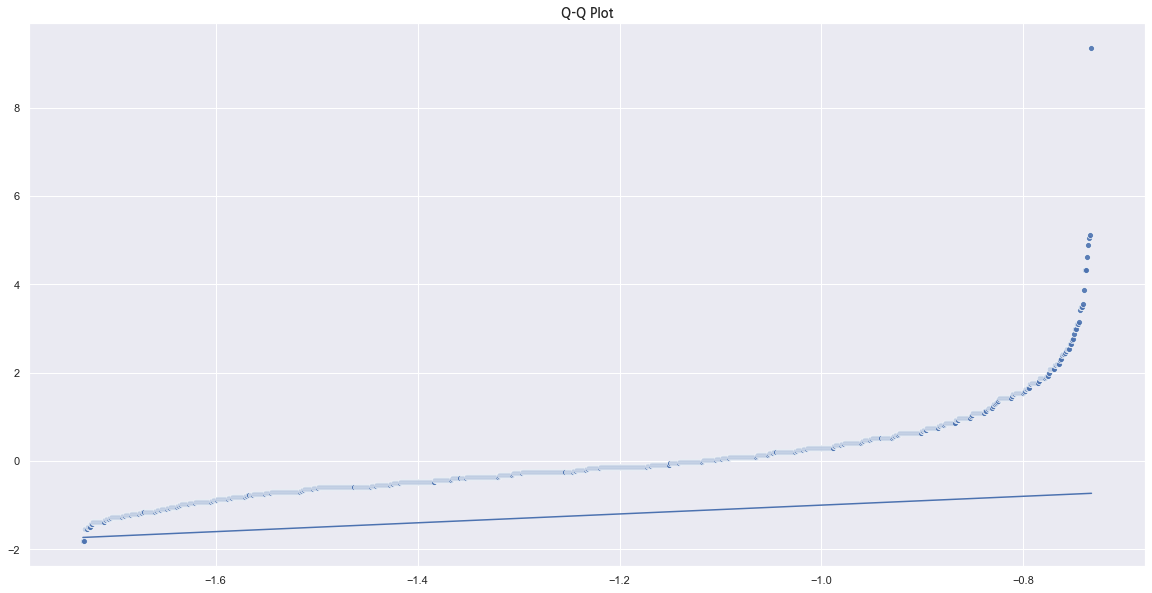

In [157]:
sns.scatterplot(data=df_tmp, x="qtl_z", y="z-score", alpha=0.9)
sns.lineplot(data=df_tmp, x="line", y="line")
plot_title(title='Q-Q Plot', xlabel="", ylabel="", fontproperties=fontprop, fontsize=13)

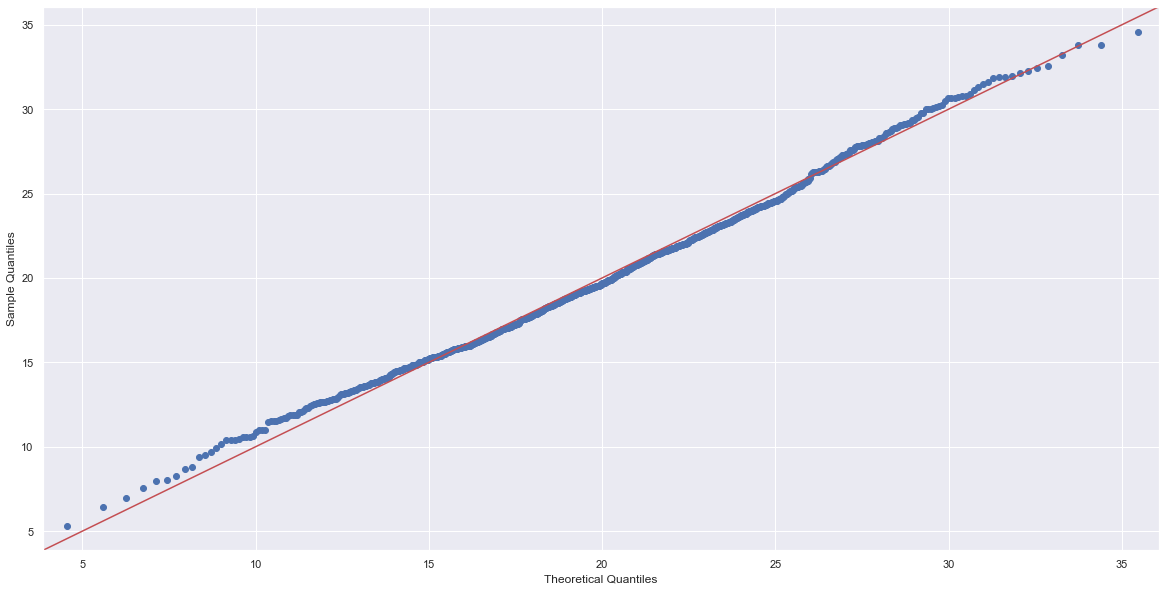

In [76]:
import statsmodels.api as sm
import pylab

test = np.random.normal(20,5, 1000)

sm.qqplot(test, loc=20, scale=5, line='45')
pylab.show()

# 긴 꼬리 분포
- 정규분포가 아닌 한 쪽으로 치우진 모든 분포가 여기에 해당한다.
- 이러한 비대칭 분포에서는 긴 꼬리를 잘 들여다보는 것이 상당히 중요하게 작용할 수 있다. (black swan theory)

# t-분포
- 현실에서 정규분포와 유사하지만 양 끝단의 비중이 더 큰 분포인 데이터들을 발견할 수 있다. 정규분포라 가정했을 때보다 극단적 현상이 더 자주 발생한다는 뜻이다.
- 분포의 모양을 볼 때 양 끝(꼬리) 부분이 정규분포보다 두껍다고 해서 이를 팻 테일(fat tail) 현상이라고 한다. 
- 예를 들어 주식의 수익률은 보통 정규분포를 따르는 것으로 가정하는데 실제로는 정규분포에서는 자주 발생할 수 없는 극단적인 사건들이 종종 발생하곤 한다.
- 금융시장에서는 이러한 현상을 블랙 스완(black swan)이라고도 한다.
---
- 정규분포의 표본을 표준편차로 나눠 정규화한 𝑧통계량은 항상 정규분포가 된다는 것은 이미 공부하였다.
- 그런데 𝑧통계량을 구하려면 확률분포의 정확한 표준편차를 우리가 알고 있어야 한다. 하지만 현실적으로는 표준편차를 정확히 알 수 없기 때문에 표본에서 측정한 표본표준편차로 정규화할 수밖에 없다.
- 정규분포로부터 얻은 𝑁 개의 표본 𝑥1,⋯,𝑥𝑁 에서 계산한 표본평균을 표본표준편차로 정규화한 값을 𝑡통계량이라고 한다.
- 𝑡  통계량은 자유도가  𝑁−1 인 스튜던트 t분포를 이룬다.
---
- 정규분포와 t분포는 검정의 관점에서 바라볼 필요가 있다.
- 정규분포를 이용한 검정의 경우, 중심에서 비교적 조금만 벗어나도 다르다는 결과를 보이지만 t분포는 정규분포에 비해 상대적으로 더 벗어나도 같다는 결과를 준다.
- 이는 표본 수가 적은데서 나오는 우연에 의한 극단적인 값에 대해서도 어느정도 유연한 검정 결과를 준다고 할 수 있다.
---
- 정규분포와 다르게 t분포는 모분산 σ2 를 포함하고 있지 않다. 이는 표본 수가 적을 때 신뢰성을 더해준다.
- 표본 수가 적을 때, t분포는 표준정규분포보다 양쪽 꼬리가 더 두텁다. 이는 보다 보수적인 검정을 하게 해준다.
- 표본수가 많아지면 t분포와 표준정규분포에 근사한다.

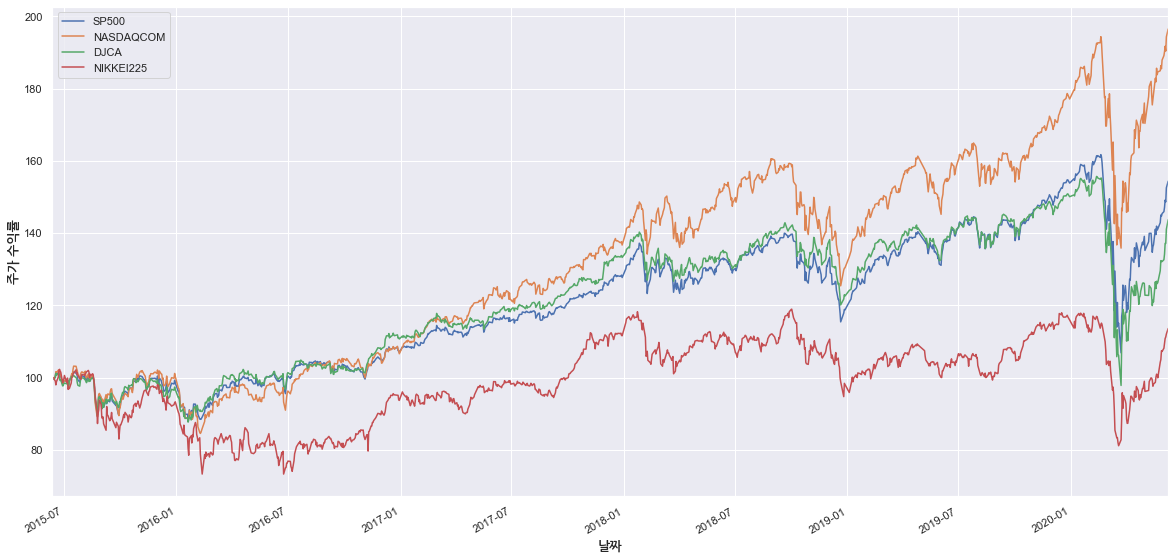

In [161]:
import pandas_datareader.data as web

symbols = ['SP500', 'NASDAQCOM', 'DJCA', 'NIKKEI225']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred')[sym]
data = data.dropna()
(data / data.iloc[0] * 100).plot()

plot_title(title="", xlabel="날짜", ylabel="주가 수익률", fontproperties=fontprop, fontsize=13)
plt.show()

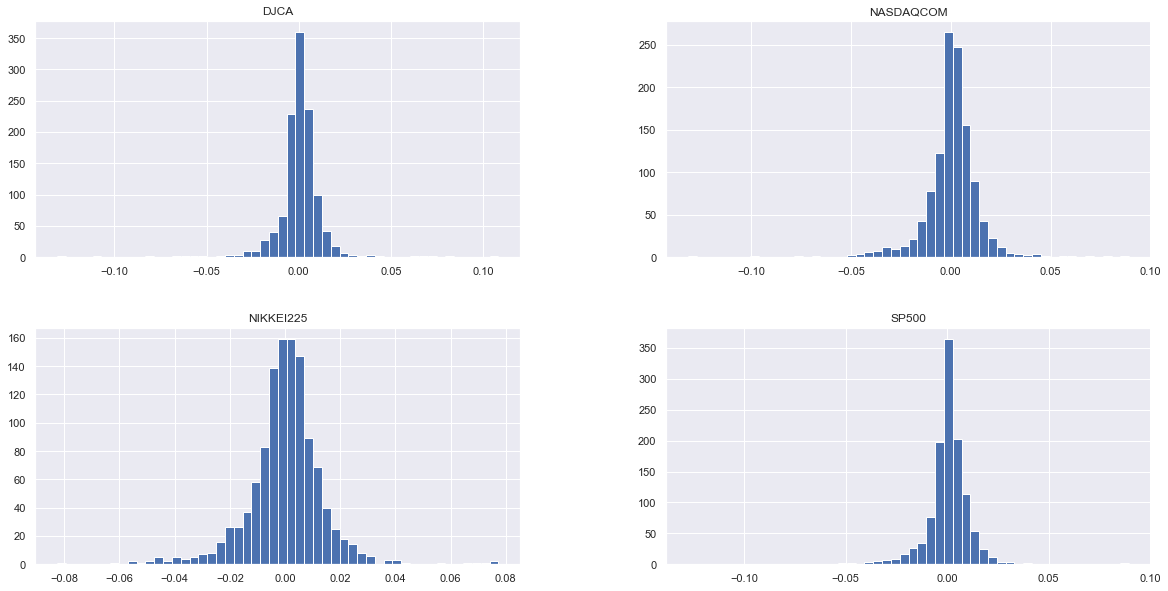

In [162]:
log_returns = np.log(data / data.shift(1))
log_returns.hist(bins=50)
plt.show()

# 이 데이터에서 각 지수의 일간 수익률을 구하여 그 분포의 모양을 히스토그램으로 그리면 정규분포와 비슷하게 생겼다.

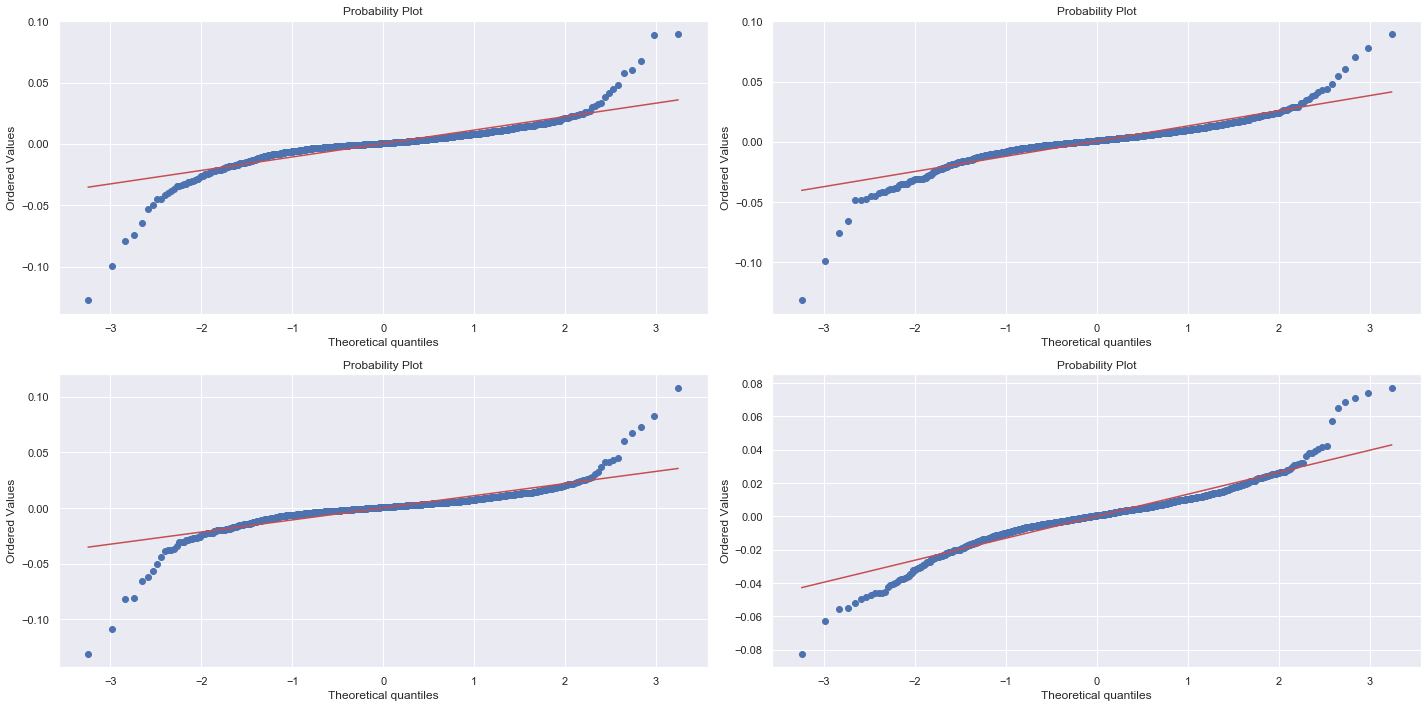

In [166]:
from scipy import stats 

for i, sym in enumerate(symbols):
    ax = plt.subplot(2, 2, i+1)
    stats.probplot(log_returns[sym].dropna(), plot=ax)
plt.tight_layout()
plt.show()

# 하지만 Q-Q 플롯으로 정규성을 확인하면 정규분포보다 더 극단적인 경우가 많이 발생하고 있음을 알 수 있다.
# 이렇게 팻 테일을 보이는 데이터 모형에 적합한 것이 스튜던트 t분포(student-t distribution) 혹은 t분포라고 부르는 분포다. 스튜던트 t분포의 확률 밀도 함수는 다음 수식에 의해 정의된다.

/Users/hwangyungwan/opt/anaconda3/envs/ds37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hwangyungwan/opt/anaconda3/envs/ds37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hwangyungwan/opt/anaconda3/envs/ds37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hwangyungwan/opt/anaconda3/envs/ds37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/hwangyungwan/opt/anaconda3/envs/ds37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 

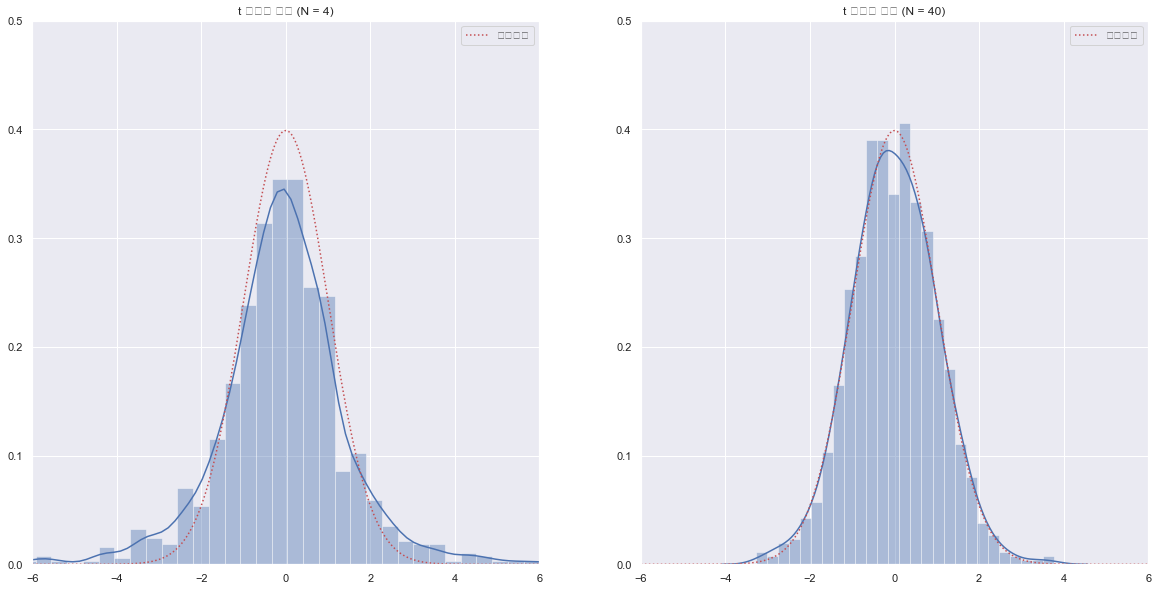

In [168]:
np.random.seed(0)

rv = stats.norm()
M = 1000

plt.subplot(1, 2, 1)
N = 4
x1 = rv.rvs((N, M))
xbar1 = x1.mean(axis=0)
xstd1 = x1.std(axis=0, ddof=1)
x = xbar1 / (xstd1 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label="정규분포")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("t 통계량 분포 (N = 4)")
plt.legend()

plt.subplot(1, 2, 2)
N = 40
x2 = rv.rvs((N, M))
xbar2 = x2.mean(axis=0)
xstd2 = x2.std(axis=0, ddof=1)
x = xbar2 / (xstd2 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label="정규분포")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("t 통계량 분포 (N = 40)")
plt.legend()

plt.show()

# 이항분포

In [3]:
# from google.cloud import bigquery
# client = bigquery.Client()

# QUERY = client.query("""
#     SELECT customer_id
#           ,COUNT(DATE(order_dt)) AS cnt
#       FROM `rgpkorea-datawarehouse.dhk_mart.fact_order_20*`
#      WHERE 1=1
#        AND _TABLE_SUFFIX BETWEEN FORMAT_DATE('%y%m%d', DATE_SUB(CURRENT_DATE('Asia/Seoul'), INTERVAL 30 DAY))
#                              AND FORMAT_DATE('%y%m%d', DATE_SUB(CURRENT_DATE('Asia/Seoul'), INTERVAL 1 DAY))
#        AND order_detail_type = 'touch'
#        AND order_result_code = 'success'
#        AND test_order_yn = FALSE
#        AND district_id <> 5981
#   GROUP BY 1
#   """)
# df = QUERY.result().to_dataframe()

df = pd.read_csv('./data/distribution_test.csv')
df['prob'] = df.cnt / 30

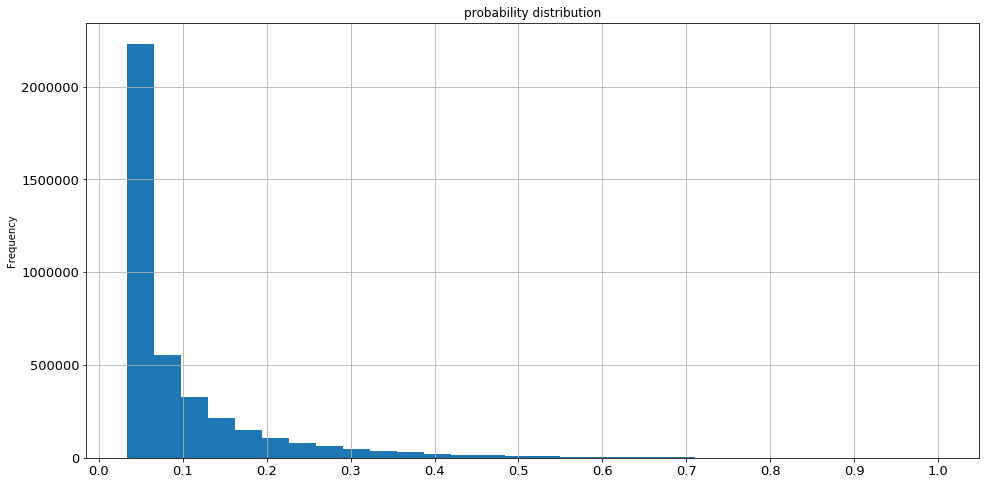

In [7]:
df.prob.plot(kind='hist',
             bins=30,
             figsize=(16,8),
             title='probability distribution',
             xticks=(np.linspace(0, 1, 11)),
             fontsize=13,grid=True)

In [8]:
def combination(n, m):
  if n>0 and m==0 and n>m:
    return 1
  elif n>0 and m>0 and n>m:
    n_fac, m_fac, n_m_fac = 1, 1, 1
    for i in range(1, n+1):
      n_fac *= i
    for j in range(1, m+1):
      m_fac *= j
    for k in range(1, n-m+1):
      n_m_fac *= k
    return n_fac / (m_fac * n_m_fac)
  elif n>0 and m>=0 and n==m:
    return 1
  else:
    raise ValueError("'m' must be less then 'n' or equals to 'n'!!")
    
def binomial(n, m, p):
  return combination(n=n, m=m) * (p**m) * ((1-p)**(n-m))

In [9]:
df_samples = df.sample(n=100).sort_values('prob', ascending=False)

In [10]:
df_prob = pd.DataFrame()
n=30
for row in tqdm.tqdm(df_samples.itertuples(), total=df_samples.shape[0]) :
  prob = []
  success = []
  for i in range(1, n+1):
    prob.append(binomial(n=n, m=i, p=row.prob))
    success.append(i)
  df_prob = df_prob.append(pd.DataFrame({'customer_id':row.customer_id, 'success':success, 'prob':prob, 'e':row.cnt}))

100%|██████████| 100/100 [00:00<00:00, 236.75it/s]


In [11]:
df_prob.head()

,customer_id,success,prob,e
0,439348217,1,2.700000e-28,27
1,439348217,2,3.523500e-26,27
2,439348217,3,2.959740e-24,27
3,439348217,4,1.798042e-22,27
4,439348217,5,8.414837e-21,27


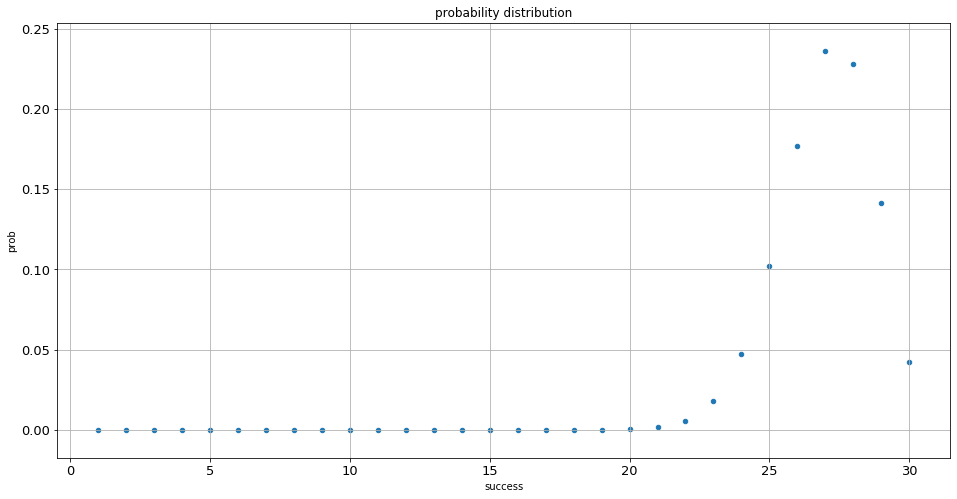

In [12]:
df_prob[df_prob.customer_id==439348217].plot(kind='scatter', x='success', y='prob', figsize=(16,8), fontsize=13, title='probability distribution', grid=True)

In [224]:
df_tmp = df_prob.query('success>=e').groupby(['customer_id','e'])['prob'].agg(prob_sum='sum').reset_index()

In [237]:
result = pd.DataFrame()
for i in range(1, 31):
  result_tmp = df_prob[df_prob.success >= i].groupby(['customer_id', 'e'])['prob'].agg(prob_sum='sum').reset_index()
  result_tmp['from'] = i
  result = result.append(result_tmp)
  result = result.sort_values(['customer_id', 'from']).reset_index(drop=True)

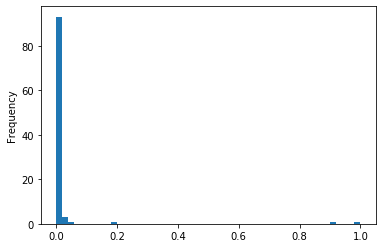

In [263]:
result[result['from']==17].prob_sum.plot(kind='hist', bins=50)

# 푸아송 분포
- 고객의 하루 평균 주문 수가 𝜆 일 때 앞으로 30일 이내 발생할 주문 수는?

In [13]:
df

,customer_id,cnt,prob
0,49345025,14,0.466667
1,379517972,13,0.433333
2,360660472,13,0.433333
3,370439529,14,0.466667
4,414061134,15,0.500000
...,...,...,...
3943318,301859246,12,0.400000
3943319,372970445,12,0.400000
3943320,143538317,12,0.400000
3943321,441176835,12,0.400000
